## Problem 1

In [71]:
import sympy as sp
from sympy import sin, cos, pi
import numpy as np
import matplotlib.pyplot as plt

theta0, theta1, theta2, theta3, theta4, theta5 = sp.symbols('theta1 theta2 theta3 theta4 theta5 theta6')
d0, d1, d2, d3, d4, d5 = sp.symbols('d1 d2 d3 d4 d5 d6')
a0, a1, a2, a3, a4, a5 = sp.symbols('a1 a2 a3 a4 a5 a6')
alpha0, alpha1, alpha2, alpha3, alpha4, alpha5 = sp.symbols('alpha1 alpha2 alpha3 alpha4 alpha5 alpha6')

theta_0, d_0, a_0, alpha_0 = theta0, 50e-3, 0, pi/2
theta_1, d_1, a_1, alpha_1 = theta1 + pi/2, 0, 93e-3, 0
theta_2, d_2, a_2, alpha_2 = theta2, 0, 93e-3, 0
theta_3, d_3, a_3, alpha_3 = theta3, 0, 0, 0

theta = [theta_0, theta_1, theta_2, theta_3]
d = [d_0, d_1, d_2, d_3]
a = [a_0, a_1, a_2, a_3]
alpha = [alpha_0, alpha_1, alpha_2, alpha_3]

# Rød=x, Grøn=y, Blå=z
joint_matrix = sp.Matrix([
                 [0, 0, 0, 0],
                 [theta_0, d_0, a_0, alpha_0],
                 [theta_1, d_1, a_1, alpha_1],
                 [theta_2, d_2, a_2, alpha_2],
                 [theta_3, d_3, a_3, alpha_3]])

display(joint_matrix)


Matrix([
[            0,    0,     0,    0],
[       theta1, 0.05,     0, pi/2],
[theta2 + pi/2,    0, 0.093,    0],
[       theta3,    0, 0.093,    0],
[       theta4,    0,     0,    0]])

In [72]:
from sympy import latex

T = lambda theta, d, a, alpha: sp.Matrix([[cos(theta), -sin(theta)*cos(alpha), sin(theta)*sin(alpha), a*cos(theta)],
                                          [sin(theta), cos(theta)*cos(alpha), -cos(theta)*sin(alpha), a*sin(theta)],
                                          [0, sin(alpha), cos(alpha), d],
                                          [0, 0, 0, 1]])
Translation = lambda x, y, z: sp.Matrix([[1, 0, 0, x],
                                         [0, 1, 0, y],
                                         [0, 0, 1, z],
                                         [0, 0, 0, 1]])
A = sp.Matrix([[1, 0, 0, 0],
                                         [0, 1, 0, 0],
                                         [0, 0, 1, 0],
                                         [0, 0, 0, 1]])
T_arr = [A]
for (th, di, ai, al) in zip(theta, d, a, alpha):
     T_arr.append(T_arr[-1]*T(th, di, ai, al))

pointer = [50e-3, 0, 0]
camera = [35e-3, 45e-3, 0]

T_4 = sp.simplify(T_arr[4] * Translation(*pointer))
T_5 = sp.simplify(T_arr[4] * Translation(*camera))

T_arr.append(T_4)
display(T_4)
print(latex(T_4))
display(T_5)
print(latex(T_5))

Matrix([
[-sin(theta2 + theta3 + theta4)*cos(theta1), -cos(theta1)*cos(theta2 + theta3 + theta4),  sin(theta1), -(0.093*sin(theta2) + 0.093*sin(theta2 + theta3) + 0.05*sin(theta2 + theta3 + theta4))*cos(theta1)],
[-sin(theta1)*sin(theta2 + theta3 + theta4), -sin(theta1)*cos(theta2 + theta3 + theta4), -cos(theta1), -(0.093*sin(theta2) + 0.093*sin(theta2 + theta3) + 0.05*sin(theta2 + theta3 + theta4))*sin(theta1)],
[             cos(theta2 + theta3 + theta4),             -sin(theta2 + theta3 + theta4),            0,         0.093*cos(theta2) + 0.093*cos(theta2 + theta3) + 0.05*cos(theta2 + theta3 + theta4) + 0.05],
[                                         0,                                          0,            0,                                                                                                  1]])

\left[\begin{matrix}- \sin{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)} \cos{\left(\theta_{1} \right)} & - \cos{\left(\theta_{1} \right)} \cos{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)} & \sin{\left(\theta_{1} \right)} & - \left(0.093 \sin{\left(\theta_{2} \right)} + 0.093 \sin{\left(\theta_{2} + \theta_{3} \right)} + 0.05 \sin{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)}\right) \cos{\left(\theta_{1} \right)}\\- \sin{\left(\theta_{1} \right)} \sin{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)} & - \sin{\left(\theta_{1} \right)} \cos{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)} & - \cos{\left(\theta_{1} \right)} & - \left(0.093 \sin{\left(\theta_{2} \right)} + 0.093 \sin{\left(\theta_{2} + \theta_{3} \right)} + 0.05 \sin{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)}\right) \sin{\left(\theta_{1} \right)}\\\cos{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)} & - \sin{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)} & 0 & 0.093 \cos{\left(\th

Matrix([
[-sin(theta2 + theta3 + theta4)*cos(theta1), -cos(theta1)*cos(theta2 + theta3 + theta4),  sin(theta1), -(0.093*sin(theta2) + 0.093*sin(theta2 + theta3) + 0.035*sin(theta2 + theta3 + theta4) + 0.045*cos(theta2 + theta3 + theta4))*cos(theta1)],
[-sin(theta1)*sin(theta2 + theta3 + theta4), -sin(theta1)*cos(theta2 + theta3 + theta4), -cos(theta1), -(0.093*sin(theta2) + 0.093*sin(theta2 + theta3) + 0.035*sin(theta2 + theta3 + theta4) + 0.045*cos(theta2 + theta3 + theta4))*sin(theta1)],
[             cos(theta2 + theta3 + theta4),             -sin(theta2 + theta3 + theta4),            0,        -0.045*sin(theta2 + theta3 + theta4) + 0.093*cos(theta2) + 0.093*cos(theta2 + theta3) + 0.035*cos(theta2 + theta3 + theta4) + 0.05],
[                                         0,                                          0,            0,                                                                                                                                         1]])

\left[\begin{matrix}- \sin{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)} \cos{\left(\theta_{1} \right)} & - \cos{\left(\theta_{1} \right)} \cos{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)} & \sin{\left(\theta_{1} \right)} & - \left(0.093 \sin{\left(\theta_{2} \right)} + 0.093 \sin{\left(\theta_{2} + \theta_{3} \right)} + 0.035 \sin{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)} + 0.045 \cos{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)}\right) \cos{\left(\theta_{1} \right)}\\- \sin{\left(\theta_{1} \right)} \sin{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)} & - \sin{\left(\theta_{1} \right)} \cos{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)} & - \cos{\left(\theta_{1} \right)} & - \left(0.093 \sin{\left(\theta_{2} \right)} + 0.093 \sin{\left(\theta_{2} + \theta_{3} \right)} + 0.035 \sin{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)} + 0.045 \cos{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)}\right) \sin{\left(\theta_{1} \right)}\\\cos{\left(\

## Problem 2

In [73]:
angle_in_interval = lambda angle: (angle + np.pi) % (2 * np.pi) - np.pi
def get_angles(T, pos, initial_guess):
    x_04 = T[0:3,0]
    o_04 = T[0:3,3]
    eq1 = sp.Eq(o_04[0], pos[0])
    eq2 = sp.Eq(o_04[1], pos[1])
    eq3 = sp.Eq(o_04[2], pos[2])
    eq4 = sp.Eq(x_04[2], 0)
    print(sp.latex(eq1))
    print(sp.latex(eq2))
    print(sp.latex(eq3))
    print(sp.latex(eq4))

    
    # Solve numerically
    solution = sp.nsolve((eq1, eq2, eq3, eq4), [theta0, theta1, theta2, theta3], initial_guess, tol=1e-6)
    #convert to degrees
    solution = [angle_in_interval(s) for s in solution]
    
    return solution

# Example usage
initial_guess = [1, 1, 1, 1]  # Provide an initial guess for the angles
pos = sp.Matrix([150e-3, 0, 120e-3])  # Example position
angles = get_angles(T_4, pos, initial_guess)

print(angles)
print("Position")
display(T_4.subs({theta0: angles[0], theta1: angles[1], theta2: angles[2], theta3: angles[3]})*sp.Matrix([0, 0, 0, 1]))

- \left(0.093 \sin{\left(\theta_{2} \right)} + 0.093 \sin{\left(\theta_{2} + \theta_{3} \right)} + 0.05 \sin{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)}\right) \cos{\left(\theta_{1} \right)} = 0.15
- \left(0.093 \sin{\left(\theta_{2} \right)} + 0.093 \sin{\left(\theta_{2} + \theta_{3} \right)} + 0.05 \sin{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)}\right) \sin{\left(\theta_{1} \right)} = 0
0.093 \cos{\left(\theta_{2} \right)} + 0.093 \cos{\left(\theta_{2} + \theta_{3} \right)} + 0.05 \cos{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)} + 0.05 = 0.12
\cos{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)} = 0
[3.14159265091813, 0.105133894885533, 1.70987314379513, -0.244210711885764]
Position


Matrix([
[    0.149999997930147],
[-4.00749979384566e-10],
[     0.11999998299887],
[                    1]])

## Problem 3

In [74]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

pc = sp.Matrix([150e-3, 0, 120e-3])
R = 32e-3
N_circle = 37
angles_in_circ = np.linspace(0, 2*np.pi, N_circle)
p_circ = [pc + R*sp.Matrix([0, cos(phi), sin(phi)]) for phi in angles_in_circ] 
index_to_angle = {i: a for i, a in enumerate(angles_in_circ)}

angles_circ = []
initial_guess = [0.210182586676604, -0.140623923276670, -1.66990262183703, 0.239730218318808]
for p in p_circ:
    angles_circ_temp = get_angles(T_4, p, initial_guess)
    initial_guess = angles_circ_temp
    angles_circ.append(angles_circ_temp)

import pandas as pd
table_circ_angles = np.linspace(0, 360, N_circle).astype(int)

# Create DataFrame with angles as the index
df = pd.DataFrame(np.array(angles_circ).astype(float)/np.pi*180, index=table_circ_angles, columns=["$\\theta_1$", "$\\theta_2$", "$\\theta_3$", "$\\theta_4$"])

# Export to LaTeX
latex_code = df.to_latex(index=True, float_format="%.2f", caption="Circle Angle Data", label="tab:circle_angle_data")

#print(latex_code)

theta1_problem3 = [a[0] for a in angles_circ]
theta2_problem3 = [a[1] for a in angles_circ]
theta3_problem3 = [a[2] for a in angles_circ]
theta4_problem3 = [a[3] for a in angles_circ]

np.savetxt("latex_data/problem3_theta1.txt", theta1_problem3)
np.savetxt("latex_data/problem3_theta2.txt", theta2_problem3)
np.savetxt("latex_data/problem3_theta3.txt", theta3_problem3)
np.savetxt("latex_data/problem3_theta4.txt", theta4_problem3)

- \left(0.093 \sin{\left(\theta_{2} \right)} + 0.093 \sin{\left(\theta_{2} + \theta_{3} \right)} + 0.05 \sin{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)}\right) \cos{\left(\theta_{1} \right)} = 0.15
- \left(0.093 \sin{\left(\theta_{2} \right)} + 0.093 \sin{\left(\theta_{2} + \theta_{3} \right)} + 0.05 \sin{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)}\right) \sin{\left(\theta_{1} \right)} = 0.032
0.093 \cos{\left(\theta_{2} \right)} + 0.093 \cos{\left(\theta_{2} + \theta_{3} \right)} + 0.05 \cos{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)} + 0.05 = 0.12
\cos{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)} = 0
- \left(0.093 \sin{\left(\theta_{2} \right)} + 0.093 \sin{\left(\theta_{2} + \theta_{3} \right)} + 0.05 \sin{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)}\right) \cos{\left(\theta_{1} \right)} = 0.15
- \left(0.093 \sin{\left(\theta_{2} \right)} + 0.093 \sin{\left(\theta_{2} + \theta_{3} \right)} + 0.05 \sin{\left(\theta_{2} + \theta_{3} + \theta_{4} \

**Illustration of inverse kinematics**

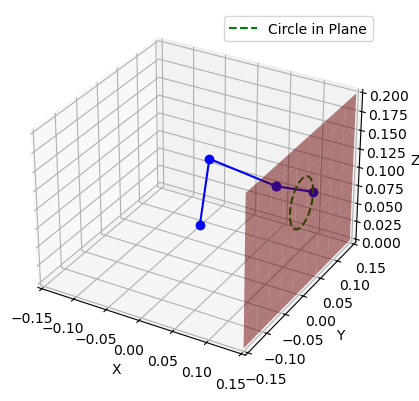

In [75]:
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display

def plot_robot_from_angles(angles):
    p1 = T_arr[1].subs({theta0: angles[0], theta1: angles[1], theta2: angles[2], theta3: angles[3]})*sp.Matrix([0, 0, 0, 1])
    p2 = T_arr[2].subs({theta0: angles[0], theta1: angles[1], theta2: angles[2], theta3: angles[3]})*sp.Matrix([0, 0, 0, 1])
    p3 = T_arr[3].subs({theta0: angles[0], theta1: angles[1], theta2: angles[2], theta3: angles[3]})*sp.Matrix([0, 0, 0, 1])
    p4 = T_arr[4].subs({theta0: angles[0], theta1: angles[1], theta2: angles[2], theta3: angles[3]})*sp.Matrix([0, 0, 0, 1])
    p5 = T_4.subs({theta0: angles[0], theta1: angles[1], theta2: angles[2], theta3: angles[3]})*sp.Matrix([0, 0, 0, 1])

    import matplotlib.pyplot as plt    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Extract points
    points = [p1, p2, p3, p4, p5]
    x_vals = [p[0] for p in points]
    y_vals = [p[1] for p in points]
    z_vals = [p[2] for p in points]

    # Plot points and lines
    ax.plot(x_vals, y_vals, z_vals, marker='o', linestyle='-', color='b')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([-0.15, 0.15])
    ax.set_ylim([-0.15, 0.15])
    ax.set_zlim([0, 0.2])
    # Plot a plane with x=0.15
    xx, yy = np.meshgrid(np.linspace(-0.15, 0.15, 10), np.linspace(0, 0.2, 10))
    zz = np.zeros_like(xx) + 0.15
    ax.plot_surface(zz, xx, yy, color='r', alpha=0.5)
    # Plot the circle in the plane
    x_vals = [p[0] for p in p_circ]
    y_vals = [p[1] for p in p_circ]
    z_vals = [p[2] for p in p_circ]
    ax.plot(x_vals, y_vals, z_vals, 'g--', label='Circle in Plane')
    ax.legend()
    plt.show()

    
plot_robot_from_angles(angles_circ[0])



## Problem 4

In [76]:
Jac = sp.zeros(6, 4)
o_n = T_arr[-1][:3, 3]
for i in range(1, T_arr.__len__()-1):
    z_i1 = T_arr[i-1][:3, 2]
    o_i1 = T_arr[i-1][:3, 3]
    Jac[:3, i-1] = z_i1.cross(o_n - o_i1)
    Jac[3:, i-1] = z_i1

In [77]:
# Define the function to round and set small values to 0
def round_and_zero(matrix, decimals, threshold=1e-10):
    def process_value(x):
        rounded_value = round(x, decimals)
        return rounded_value if abs(rounded_value) >= threshold else 0
    return matrix.applyfunc(process_value)

# Updated print_jac function
def print_jac(angles):
    jacobian = Jac.subs({theta0: angles[0], theta1: angles[1], theta2: angles[2], theta3: angles[3]})
    processed_jacobian = round_and_zero(jacobian, 4)
    display(processed_jacobian)

print("Jacobian for phi = 0")
print_jac(angles_circ[0])
print("Jacobian for phi = pi/2")
print_jac(angles_circ[9])
print("Jacobian for phi = pi")
print_jac(angles_circ[18])
print("Jacobian for phi = 3*pi/2")
print_jac(angles_circ[27])

Jacobian for phi = 0


Matrix([
[-0.032, -0.0685, 0.0216,      0],
[  0.15, -0.0146, 0.0046,      0],
[     0,  0.1534, 0.1403,   0.05],
[     0,  0.2086, 0.2086, 0.2086],
[     0,  -0.978, -0.978, -0.978],
[     1,       0,      0,      0]])

Jacobian for phi = pi/2


Matrix([
[   0, -0.102, -0.0093,    0],
[0.15,      0,       0,    0],
[   0,   0.15,  0.1425, 0.05],
[   0,      0,       0,    0],
[   0,   -1.0,    -1.0, -1.0],
[   1,      0,       0,    0]])

Jacobian for phi = pi


Matrix([
[0.032, -0.0685,  0.0216,       0],
[ 0.15,  0.0146, -0.0046,       0],
[    0,  0.1534,  0.1403,    0.05],
[    0, -0.2086, -0.2086, -0.2086],
[    0,  -0.978,  -0.978,  -0.978],
[    1,       0,       0,       0]])

Jacobian for phi = 3*pi/2


Matrix([
[   0, -0.038, 0.0521,    0],
[0.15,      0,      0,    0],
[   0,   0.15,  0.127, 0.05],
[   0,      0,      0,    0],
[   0,   -1.0,   -1.0, -1.0],
[   1,      0,      0,    0]])

## Problem 5

In [78]:
angles_pi_2 = angles_circ[9]
substitutions = {theta0: angles_pi_2[0], theta1: angles_pi_2[1], theta2: angles_pi_2[2], theta3: angles_pi_2[3]}
jacobian_0_4 = Jac.subs(substitutions)

q1, q2, q3, q4 = sp.symbols('q1 q2 q3 q4')
q_arr = sp.Matrix([q1, q2, q3, q4])

jac_arr = jacobian_0_4*q_arr
wx, wy, wz = jac_arr[3], jac_arr[4], jac_arr[5]
skew = sp.Matrix([[0, -wz, wy], [wz, 0, -wx], [-wy, wx, 0]])
T_4_dot = skew*T_arr[4][:3, :3]

l1 = sp.Eq(jac_arr[0], 0)
l2 = sp.Eq(jac_arr[1], -3)
l3 = sp.Eq(jac_arr[2], 0)
l4 = sp.Eq(T_4_dot[2, 0].subs(substitutions), 0)

display(l1)
display(l2)
display(l3)
display(l4)

# Initial guess for the variables
initial_guess = [1, 1, 1, 1]

# Solve numerically
solution = sp.nsolve((l1, l2, l3, l4), (q1, q2, q3, q4), initial_guess)
display(solution)


Eq(3.52254699809951e-9*q1 - 0.101999940613407*q2 - 0.00930012279357406*q3 + 1.49795071522904e-17*q4, 0)

Eq(0.149999994781022*q1 + 2.39533064743507e-9*q2 + 2.18400805121933e-10*q3 - 3.95618080114483e-25*q4, -3)

Eq(0.149999994781022*q2 + 0.142533819309615*q3 + 0.05*q4, 0)

Eq(1.0*q2 + 1.0*q3 + 1.0*q4, 0)

Matrix([
[   -20.0000006958637],
[-7.66192277892153e-7],
[ 8.28013199521246e-7],
[-6.18209216290925e-8]])

## Problem 6

In [79]:
t = sp.symbols('t')
Jacobi_at_angle = lambda N_angle: Jac.subs({theta0: angles_circ[N_angle][0], theta1: angles_circ[N_angle][1], theta2: angles_circ[N_angle][2], theta3: angles_circ[N_angle][3]})
Transformation_at_angle = lambda N_angle: T_arr[4].subs({theta0: angles_circ[N_angle][0], theta1: angles_circ[N_angle][1], theta2: angles_circ[N_angle][2], theta3: angles_circ[N_angle][3]})
def get_polynomials_from_knotpoints(angles, acceleration=True, v = 0.027):
    states = sp.Matrix([angles_circ[angle] for angle in angles])
    deg = 5 if acceleration else 3
    jacobi_list = [Jacobi_at_angle(i) for i in angles]

    # defining the polynomial constants as variables
    def create_symbols(prefix):
        return sp.Matrix([[sp.symbols(f'{prefix}{i}{j}') for j in range(deg, -1, -1)] for i in range(1, 5)])

    var_names = [f'S{i}' for i in range(len(angles)-1)]
    var_arr = [create_symbols(var_name) for var_name in var_names]


    # defining polynomial constants for the segments:
    t_vec = sp.Matrix([t**i for i in range(deg, -1, -1)])
    t_vec_diff = t_vec.diff(t)
    t_vec_diffdiff = t_vec.diff(t,t)

    # velocity boundaries - using jacobian
    v_arr = [np.array([0,-np.sin(index_to_angle[i]), np.cos(index_to_angle[i]),0])*v for i in angles[1:len(angles)-1]]
    v_arr = sp.Matrix([[0,0,0,0], *v_arr, [0,0,0,0]])

    # since the arm is overconstrained, we need to use the pseudoinverse:
    x_dot_eq_mat_arr = [sp.Matrix([[1,0,0,0,0,0],
                          [0,1,0,0,0,0],
                          [0,0,1,0,0,0],
                          [0,0,0,Transformation_at_angle(i)[1,0],-Transformation_at_angle(i)[0,0],0]]) for i in angles ]
    pseudoinv_jacobian_list = [(x_dot_mat*Jacobi).inv() for Jacobi, x_dot_mat  in zip(jacobi_list, x_dot_eq_mat_arr)]

    eq_arr = []

    for i, var in enumerate(var_arr):
        eq_arr.append(states[i,:].T   - ( var * t_vec.subs(t, 0)) )
        eq_arr.append(states[i+1,:].T - ( var * t_vec.subs(t, 2)) )

        eq_arr.append(pseudoinv_jacobian_list[i] * v_arr[i,:].T     - (var * t_vec_diff.subs(t, 0)))
        eq_arr.append(pseudoinv_jacobian_list[i+1] * v_arr[i+1,:].T - (var * t_vec_diff.subs(t, 2)))

        if acceleration:
            eq_arr.append(var * t_vec_diffdiff.subs(t, 0))
            eq_arr.append(var * t_vec_diffdiff.subs(t, 2))

    # the eqs list has lists of equations inside, we need to flatten it
    eqs = [eq for sublist in eq_arr for eq in sublist]

    # Solve for the individual elements
    sol = sp.solve(eqs, sp.flatten(var_arr))
    sol_arr = [sp.Matrix([[sol[sp.symbols(f'{var_name}{i}{j}')] for j in range(deg, -1, -1)] for i in range(1, 5)]) for var_name in var_names]

    q_arr = [sol* t_vec for sol in sol_arr]
    return q_arr


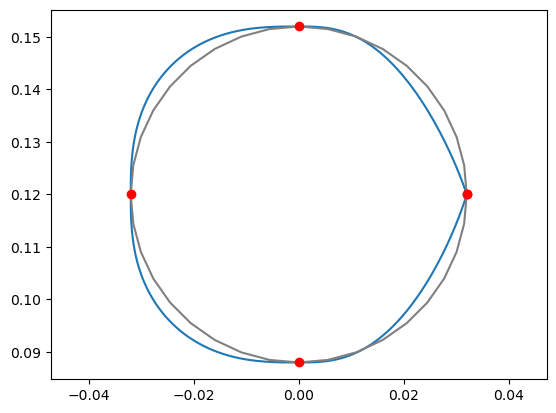

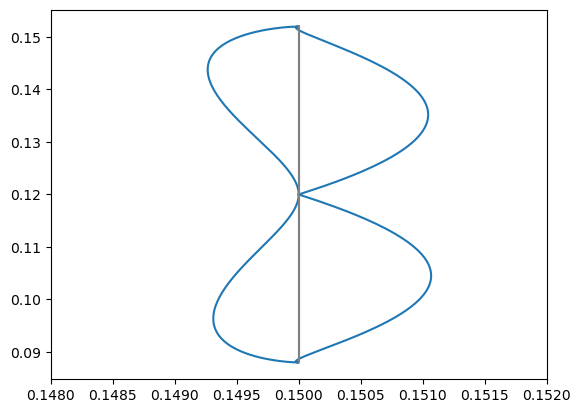

In [80]:
t_vals = np.linspace(0, 2, 100)
point_from_segment = lambda q, t_vals : np.array([np.array(T_4[0:3,3].subs({theta0: q[0], theta1: q[1], theta2: q[2], theta3: q[3]}).subs({t:t_val})).ravel() for t_val in t_vals])

# transformation matrix for the end effector
def plot_polynomials(angles, **kwargs):
    q_arr = get_polynomials_from_knotpoints(angles, **kwargs)
    segment_point_arr = [point_from_segment(q, t_vals) for q in q_arr]

    circ_x_vals = [p[0] for p in p_circ]
    circ_y_vals = [p[1] for p in p_circ]
    circ_z_vals = [p[2] for p in p_circ]

    circ_knot_points_y = [p_circ[angle][1] for angle in angles]
    circ_knot_points_z = [p_circ[angle][2] for angle in angles]

    segment_x_vals = np.array([segment_points[:,0] for segment_points in segment_point_arr]).ravel()
    segment_y_vals = np.array([segment_points[:,1] for segment_points in segment_point_arr]).ravel()
    segment_z_vals = np.array([segment_points[:,2] for segment_points in segment_point_arr]).ravel()

    np.savetxt('latex_data/problem6_x_vals.txt', segment_x_vals)
    np.savetxt('latex_data/problem6_y_vals.txt', segment_y_vals)
    np.savetxt('latex_data/problem6_z_vals.txt', segment_z_vals)
    
    plt.figure()
    plt.plot(segment_y_vals, segment_z_vals)
    plt.plot(circ_y_vals, circ_z_vals, color='grey')
    plt.plot(circ_knot_points_y, circ_knot_points_z, 'ro')
    plt.axis('equal')
    plt.show()


    plt.figure()
    plt.plot(segment_x_vals, segment_z_vals)
    plt.plot(circ_x_vals, circ_z_vals, color='grey')
    plt.xlim([0.148, 0.152])
    plt.show()



angles_4 = [0, 9, 18, 27, 0]
plot_polynomials(angles_4, acceleration = True, v=0.027)

## Problem 7

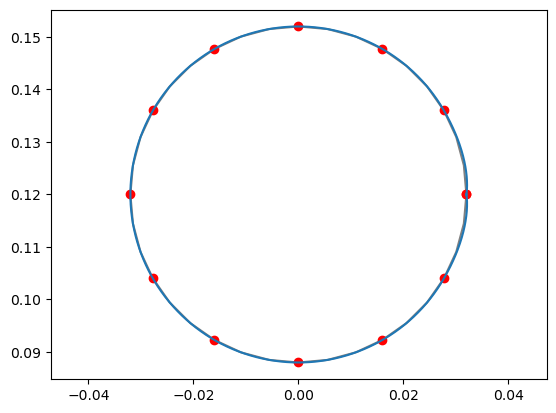

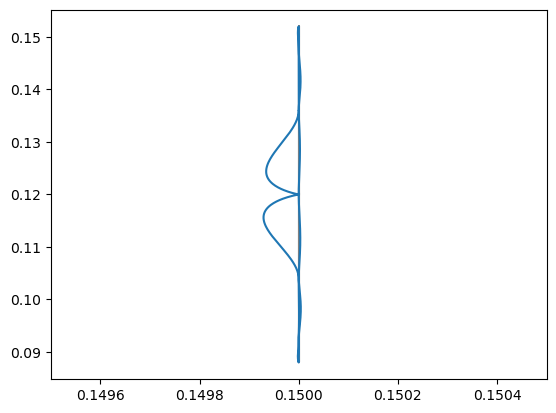

In [81]:
t_pi = 4
def get_v(theta):
    if theta < np.pi:
        alpha = 2*np.pi/t_pi**2
        return sp.Matrix( [0,-sp.sin(theta),sp.cos(theta),0] )*sp.sqrt(2*alpha*theta)*R
    else:
        alpha = 2*np.pi/t_pi**2
        return sp.Matrix( [0,-sp.sin(theta),sp.cos(theta),0] )*sp.sqrt(2*alpha*(2*np.pi-theta))*R


def get_polynomials_from_knotpoints_const_acc(angles, acceleration=False):
    states = sp.Matrix([angles_circ[angle] for angle in angles])
    deg = 5 if acceleration else 3
    jacobi_list = [Jacobi_at_angle(i) for i in angles]

    # defining the polynomial constants as variables
    def create_symbols(prefix):
        return sp.Matrix([[sp.symbols(f'{prefix}{i}{j}') for j in range(deg, -1, -1)] for i in range(1, 5)])

    var_names = [f'S{i}' for i in range(len(angles)-1)]
    var_arr = [create_symbols(var_name) for var_name in var_names]


    # defining polynomial constants for the segments:
    t_vec = sp.Matrix([t**i for i in range(deg, -1, -1)])
    t_vec_diff = t_vec.diff(t)
    t_vec_diffdiff = t_vec.diff(t,t)

    # velocity boundaries - using jacobian
    v_arr = sp.Matrix([get_v(index_to_angle[i]).T for i in angles[0:len(angles)]])

    x_dot_eq_mat_arr = [sp.Matrix([[1,0,0,0,0,0],
                          [0,1,0,0,0,0],
                          [0,0,1,0,0,0],
                          [0,0,0,Transformation_at_angle(i)[1,0],-Transformation_at_angle(i)[0,0],0]]) for i in angles ]
    pseudoinv_jacobian_list = [(x_dot_mat*Jacobi).inv() for Jacobi, x_dot_mat  in zip(jacobi_list, x_dot_eq_mat_arr)]

    eq_arr = []
    alpha = 2*np.pi/t_pi**2
    t_val = lambda i: sp.sqrt(2*index_to_angle[angles[i+1]]/alpha) - sp.sqrt(2*index_to_angle[angles[i]]/alpha) if index_to_angle[angles[i]] < np.pi else abs(sp.sqrt(2*(2*np.pi-index_to_angle[angles[i+1]])/alpha)-sp.sqrt(2*(2*np.pi-index_to_angle[angles[i]])/alpha))
    delta_t_arr = []
    for i, var in enumerate(var_arr):
        delta_t_arr.append(float(t_val(i)))
        eq_arr.append(states[i,:].T - ( var * t_vec.subs(t, 0)) )
        eq_arr.append(states[i+1,:].T - ( var * t_vec.subs(t, t_val(i))) )

        eq_arr.append((var * t_vec_diff.subs(t, 0)) - pseudoinv_jacobian_list[i] * v_arr[i,:].T)
        eq_arr.append((var * t_vec_diff.subs(t, t_val(i))) - pseudoinv_jacobian_list[i+1] * v_arr[i+1,:].T)

        if acceleration:
            eq_arr.append(var * t_vec_diffdiff.subs(t, 0))
            eq_arr.append(var * t_vec_diffdiff.subs(t, t_val(i)))

    # the eqs list has lists of equations inside, we need to flatten it
    eqs = [eq for sublist in eq_arr for eq in sublist]

    # Solve for the individual elements
    sol = sp.solve(eqs, sp.flatten(var_arr))
    sol_arr = [sp.Matrix([[sol[sp.symbols(f'{var_name}{i}{j}')] for j in range(deg, -1, -1)] for i in range(1, 5)]) for var_name in var_names]

    q_arr = [sol* t_vec for sol in sol_arr]
    return q_arr, delta_t_arr


# transformation matrix for the end effector
def plot_polynomials(angles, **kwargs):
    q_arr, delta_t_arr= get_polynomials_from_knotpoints_const_acc(angles, **kwargs)
    t_arr = [np.linspace(0, delta_t_arr[i], 100) for i in range(len(delta_t_arr))]
    segment_point_arr = [point_from_segment(q, t_arr[i]) for i, q in enumerate(q_arr)]

    circ_x_vals = [p[0] for p in p_circ]
    circ_y_vals = [p[1] for p in p_circ]
    circ_z_vals = [p[2] for p in p_circ]

    circ_knot_points_y = [p_circ[angle][1] for angle in angles]
    circ_knot_points_z = [p_circ[angle][2] for angle in angles]

    segment_x_vals = np.array([segment_points[:,0] for segment_points in segment_point_arr]).ravel()
    segment_y_vals = np.array([segment_points[:,1] for segment_points in segment_point_arr]).ravel()
    segment_z_vals = np.array([segment_points[:,2] for segment_points in segment_point_arr]).ravel()

    np.savetxt('latex_data/problem7_x_vals.txt', segment_x_vals)
    np.savetxt('latex_data/problem7_y_vals.txt', segment_y_vals)
    np.savetxt('latex_data/problem7_z_vals.txt', segment_z_vals)
    
    plt.figure()
    plt.plot(circ_y_vals, circ_z_vals, color='grey')
    plt.plot(circ_knot_points_y, circ_knot_points_z, 'ro')
    plt.plot(segment_y_vals, segment_z_vals)
    plt.axis('equal')
    plt.show()


    plt.figure()
    plt.plot(circ_x_vals, circ_z_vals, color='grey')
    plt.plot(segment_x_vals, segment_z_vals)
    plt.xlim([0.1495, 0.1505])
    plt.show()



angles_4 = list(range(0, 37, 3))
plot_polynomials(angles_4)


## Problem 8

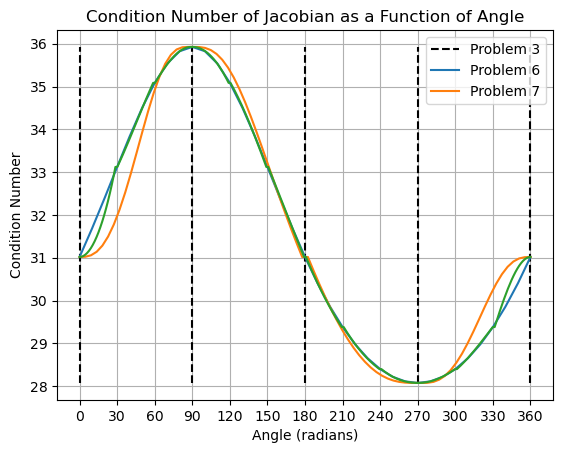

In [82]:
jacobian = lambda angles: Jac.subs({theta0: angles[0], theta1: angles[1], theta2: angles[2], theta3: angles[3]})
cond_circ = []
angles_arr = []
for i in range(0, 37, 1):
    Jacobi = jacobian(angles_circ[i])
    cond_circ.append(np.linalg.cond(np.array(Jacobi).astype(np.float64)))
    angles_arr.append(index_to_angle[i])


q_arr = get_polynomials_from_knotpoints(np.arange(0, 37, 9))
q_arr_improved, p8_dt_arr = get_polynomials_from_knotpoints_const_acc(np.arange(0, 37, 3))
t_arr_problem_8 = np.linspace(0, 2, 20)
cond_arr_problem_6 = []
for q in q_arr:
    for time in t_arr_problem_8:
        cond_arr_problem_6.append(np.linalg.cond(np.array(jacobian(q.subs(t,time))).astype(np.float64)))

cond_arr_problem7 = []
problem8_dt_arr_from_p7 = []

p8_dt_arr_sum = [0, *np.cumsum(p8_dt_arr)]
for i, q in enumerate(q_arr_improved):

    problem8_dt_arr_from_p7.append(np.linspace(p8_dt_arr_sum[i], p8_dt_arr_sum[i+1], 20))
    for time in np.linspace(0, p8_dt_arr[i], 20):
        cond_arr_problem7.append(np.linalg.cond(np.array(jacobian(q.subs(t,time))).astype(np.float64)))


angles_problem_8_deg = np.array(angles_arr)/np.pi*180
angles_problem_8_from_p6 = np.linspace(0, 360, len(cond_arr_problem_6))
angles_problem_8_from_p7 = np.linspace(0, 360, len(cond_arr_problem7))

np.savetxt('latex_data/problem8_cond_circ_from_p3.txt', np.array([angles_problem_8_deg, cond_circ]).T)
np.savetxt('latex_data/problem8_cond_circ_from_p6.txt', np.array([angles_problem_8_from_p6,cond_arr_problem_6]).T)
np.savetxt('latex_data/problem8_cond_circ_from_p7.txt', np.array([angles_problem_8_from_p7,cond_arr_problem7]).T)

plt.figure()
plt.xlabel('Angle (radians)')
plt.ylabel('Condition Number')
plt.title('Condition Number of Jacobian as a Function of Angle')
plt.vlines([0, 90, 180, 270, 360], np.min(cond_circ), np.max(cond_circ), colors='black', linestyles='dashed')
plt.grid(True)
plt.xticks(np.arange(0, 361, 30))
plt.plot(angles_problem_8_deg, cond_circ)
plt.plot(angles_problem_8_from_p6, cond_arr_problem_6)
plt.plot(angles_problem_8_from_p7, cond_arr_problem7)
plt.legend(['Problem 3', 'Problem 6', 'Problem 7'])
plt.show()

## Problem 9

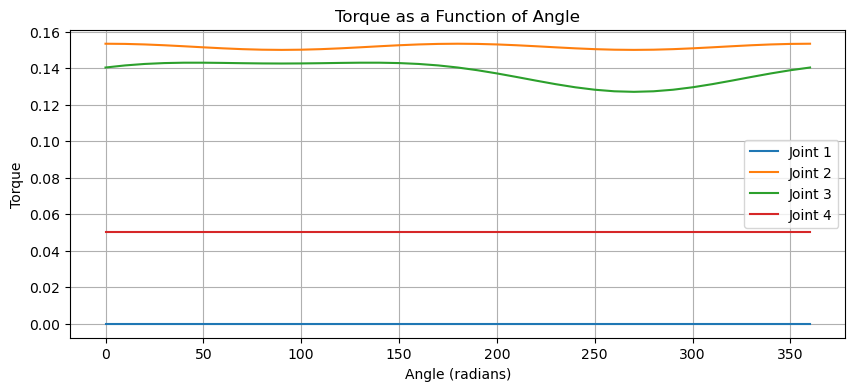

In [83]:
torque = []
F = sp.Matrix([0, 0, -1, 0, 0, 0])
for i in range(0, 37, 1):
    Jacobi = Jacobi_at_angle(i)
    torque.append(abs(Jacobi.T * F))

tau1 = [t[0] for t in torque]
tau2 = [t[1] for t in torque]
tau3 = [t[2] for t in torque]
tau4 = [t[3] for t in torque]

np.savetxt('latex_data/problem9_tau1.txt', tau1)
np.savetxt('latex_data/problem9_tau2.txt', tau2)
np.savetxt('latex_data/problem9_tau3.txt', tau3)
np.savetxt('latex_data/problem9_tau4.txt', tau4)

plt.figure(figsize=(10,4))
plt.plot(angles_problem_8_deg, tau1, label='Joint 1')
plt.plot(angles_problem_8_deg, tau2, label='Joint 2')
plt.plot(angles_problem_8_deg, tau3, label='Joint 3')
plt.plot(angles_problem_8_deg, tau4, label='Joint 4')
plt.xlabel('Angle (radians)')
plt.ylabel('Torque')
plt.title('Torque as a Function of Angle')
plt.grid(True),
plt.legend()

In [84]:
m_arr = np.array([60, 80, 80, 40])*1e-3
theta_sym = [theta0, theta1, theta2, theta3]

r = 20e-3
l = 50e-3
I0 = 1/2 * m_arr[0] * r**2
D1_dash = np.eye(3)*np.array([1, 0.4, 0.9])*I0
D2_dash = D3_dash = np.eye(3)*np.array([0.45, 1.4, 1.2])*I0
D4_dash = np.eye(3)*np.array([0.5, 0.5, 0.5])*I0

I_arr = [D1_dash, D2_dash, D3_dash, D4_dash]

Jacobi_at_joint = lambda N: sp.Matrix([Jac[:,:N].T,sp.zeros(4-N, 6)]).T

center_translation_arr = [50e-3/2, 93e-3/2, 93e-3/2, 50e-3/2]

T_arr_center = T_arr[1:5]
for i, T_mat in enumerate(T_arr_center):
    T_arr_center[i] = T_mat * Translation(center_translation_arr[i], 0, 0)

Jac_center = sp.zeros(6, 4)
o_n = T_arr_center[-1][:3, 3]
for i in range(1, T_arr_center.__len__()-1):
    z_i1 = T_arr_center[i-1][:3, 2]
    o_i1 = T_arr_center[i-1][:3, 3]
    Jac_center[:3, i-1] = z_i1.cross(o_n - o_i1)
    Jac_center[3:, i-1] = z_i1

Jacobi_center_at_joint = lambda N: sp.Matrix([Jac_center[:,:N].T,sp.zeros(4-N, 6)]).T

D = sp.Matrix(np.zeros((4,4)))
for i, I, m in zip(np.arange(1,5), I_arr, m_arr):
     D += m*Jacobi_center_at_joint(i)[:3,:].T*Jacobi_center_at_joint(i)[:3,:] + Jacobi_at_joint(i)[3:,:].T *T_arr[i][:3,:3]*I*T_arr[i][:3,:3].T*Jacobi_at_joint(i)[3:,:]


c = lambda i,j,k: 1/2*(D[k-1,j-1].diff(theta_sym[i-1]) + D[k-1,i-1].diff(theta_sym[j-1]) - D[i-1,j-1].diff(theta_sym[k-1]))

P = 0
for m,T_center in zip(m_arr, T_arr_center[1:]):
    P += -m*(sp.Matrix([0,-9.82,0]).T * T_center[:3, 3])[0]

g = lambda k: P.diff(theta_sym[k-1])

def tau(k, q, q_dot, q_dotdot):
    acc_term = sum([D[k-1,j]*q_dotdot[j] for j in range(4)])
    vel_term = sum([c(i,j,k-1)*q_dot[i]*q_dot[j] for i in range(4) for j in range(4)])
    grav_term = g(k-1)
    return (acc_term + vel_term + grav_term).subs({theta0: q[0], theta1: q[1], theta2: q[2], theta3: q[3]}).evalf()

tau1 = tau(1, [0,2,2,2], [0,2,2,0], [0,0,0,0])
display(tau1)

0.00433841655644931

[0, 2, 4, 6, 8]


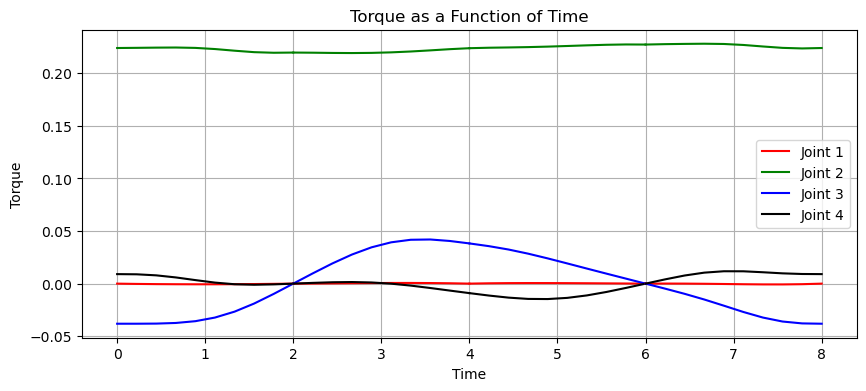

In [85]:
q_arr_p10 = get_polynomials_from_knotpoints(list(range(0, 37, 9)))
delta_t_arr_p10 = [2,2,2,2]

q_p10_arr = []
q_dot_p10_arr = []
q_dotdot_p10_arr = []

for i, q in enumerate(q_arr_p10):
    q_temp = []
    q_dot_temp = []
    q_dotdot_temp = []
    for timestep in np.linspace(0, delta_t_arr_p10[i], 10):
        q_temp.append(q.subs(t, timestep))
        q_dot_temp.append(q.diff(t).subs(t, timestep))
        q_dotdot_temp.append(q.diff(t, t).subs(t, timestep))
    q_p10_arr.append(q_temp)
    q_dot_p10_arr.append(q_dot_temp)
    q_dotdot_p10_arr.append(q_dotdot_temp)

tau1_arr = []
tau2_arr = []
tau3_arr = []
tau4_arr = []

for q, q_dot, q_dotdot in zip(q_p10_arr, q_dot_p10_arr, q_dotdot_p10_arr):
    tau1_arr.append([tau(1, q_i, q_dot_i, q_dotdot_i) for q_i, q_dot_i, q_dotdot_i in zip(q, q_dot, q_dotdot)])
    tau2_arr.append([tau(2, q_i, q_dot_i, q_dotdot_i) for q_i, q_dot_i, q_dotdot_i in zip(q, q_dot, q_dotdot)])
    tau3_arr.append([tau(3, q_i, q_dot_i, q_dotdot_i) for q_i, q_dot_i, q_dotdot_i in zip(q, q_dot, q_dotdot)])
    tau4_arr.append([tau(4, q_i, q_dot_i, q_dotdot_i) for q_i, q_dot_i, q_dotdot_i in zip(q, q_dot, q_dotdot)])
    
fig_dt_arr = [0, *np.cumsum(delta_t_arr_p10)]
p10_time_arr = [np.linspace(fig_dt_arr[i], fig_dt_arr[i+1], 10) for i in range(len(fig_dt_arr)-1)]
print(fig_dt_arr)
plt.figure(figsize=(10,4))
for i, tau1, tau2, tau3, tau4 in zip(range(len(tau1_arr)), tau1_arr, tau2_arr, tau3_arr, tau4_arr):
    plt.plot(p10_time_arr[i], tau1, color='red')
    plt.plot(p10_time_arr[i], tau2, color='green')
    plt.plot(p10_time_arr[i], tau3, color='blue')
    plt.plot(p10_time_arr[i], tau4, color='black')

plt.xlabel('Time')
plt.ylabel('Torque')
plt.title('Torque as a Function of Time')
plt.grid(True),
plt.legend(['Joint 1', 'Joint 2', 'Joint 3', 'Joint 4'])

# Flatten all the torque arrays into single arrays
tau1_flat = np.concatenate(tau1_arr).flatten()
tau2_flat = np.concatenate(tau2_arr).flatten()
tau3_flat = np.concatenate(tau3_arr).flatten()
tau4_flat = np.concatenate(tau4_arr).flatten()
dt_flat = np.concatenate(p10_time_arr).flatten()

# Save the flattened torque arrays to text files
np.savetxt("latex_data/problem10_original_tau1.txt", np.array([dt_flat, tau1_flat]).T)
np.savetxt("latex_data/problem10_original_tau2.txt", np.array([dt_flat, tau2_flat]).T)
np.savetxt("latex_data/problem10_original_tau3.txt", np.array([dt_flat, tau3_flat]).T)
np.savetxt("latex_data/problem10_original_tau4.txt", np.array([dt_flat, tau4_flat]).T)



[0, 2.8284271247461903, 4.0, 5.17157287525381, 8.0]


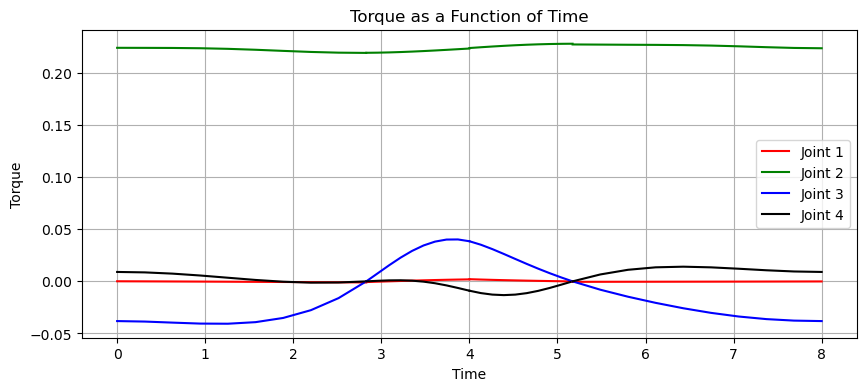

In [86]:
q_arr_p10, delta_t_arr_p10 = get_polynomials_from_knotpoints_const_acc( list(range(0, 37, 9)) )

q_p10_arr = []
q_dot_p10_arr = []
q_dotdot_p10_arr = []

for i, q in enumerate(q_arr_p10):
    q_temp = []
    q_dot_temp = []
    q_dotdot_temp = []
    for timestep in np.linspace(0, delta_t_arr_p10[i], 10):
        q_temp.append(q.subs(t, timestep))
        q_dot_temp.append(q.diff(t).subs(t, timestep))
        q_dotdot_temp.append(q.diff(t, t).subs(t, timestep))
    q_p10_arr.append(q_temp)
    q_dot_p10_arr.append(q_dot_temp)
    q_dotdot_p10_arr.append(q_dotdot_temp)

tau1_arr = []
tau2_arr = []
tau3_arr = []
tau4_arr = []

for q, q_dot, q_dotdot in zip(q_p10_arr, q_dot_p10_arr, q_dotdot_p10_arr):
    tau1_arr.append([tau(1, q_i, q_dot_i, q_dotdot_i) for q_i, q_dot_i, q_dotdot_i in zip(q, q_dot, q_dotdot)])
    tau2_arr.append([tau(2, q_i, q_dot_i, q_dotdot_i) for q_i, q_dot_i, q_dotdot_i in zip(q, q_dot, q_dotdot)])
    tau3_arr.append([tau(3, q_i, q_dot_i, q_dotdot_i) for q_i, q_dot_i, q_dotdot_i in zip(q, q_dot, q_dotdot)])
    tau4_arr.append([tau(4, q_i, q_dot_i, q_dotdot_i) for q_i, q_dot_i, q_dotdot_i in zip(q, q_dot, q_dotdot)])
    
fig_dt_arr = [0, *np.cumsum(delta_t_arr_p10)]
p10_time_arr = [np.linspace(fig_dt_arr[i], fig_dt_arr[i+1], 10) for i in range(len(fig_dt_arr)-1)]
print(fig_dt_arr)
plt.figure(figsize=(10,4))
for i, tau1, tau2, tau3, tau4 in zip(range(len(tau1_arr)), tau1_arr, tau2_arr, tau3_arr, tau4_arr):
    plt.plot(p10_time_arr[i], tau1, color='red')
    plt.plot(p10_time_arr[i], tau2, color='green')
    plt.plot(p10_time_arr[i], tau3, color='blue')
    plt.plot(p10_time_arr[i], tau4, color='black')

plt.xlabel('Time')
plt.ylabel('Torque')
plt.title('Torque as a Function of Time')
plt.grid(True),
plt.legend(['Joint 1', 'Joint 2', 'Joint 3', 'Joint 4'])

dt_flat = np.concatenate(p10_time_arr).flatten()
# Save the flattened torque arrays to text files
np.savetxt("latex_data/problem10_improved_tau1.txt", np.array([dt_flat, np.concatenate(tau1_arr).flatten()]).T)
np.savetxt("latex_data/problem10_improved_tau2.txt", np.array([dt_flat, np.concatenate(tau2_arr).flatten()]).T)
np.savetxt("latex_data/problem10_improved_tau3.txt", np.array([dt_flat, np.concatenate(tau3_arr).flatten()]).T)
np.savetxt("latex_data/problem10_improved_tau4.txt", np.array([dt_flat, np.concatenate(tau4_arr).flatten()]).T)

